In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [161]:
df = pd.read_csv('/Users/dickinsonjo/repos/CollegePriceTransparency/data/InstitutionData2020-2021.csv')
df.head(3)

/var/folders/k2/4kxlmrg53cd6kcm7w7j5g8nm0000gn/T/ipykernel_85648/2078036515.py:1: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/dickinsonjo/repos/CollegePriceTransparency/data/InstitutionData2020-2021.csv')


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


In [162]:
df.columns[0:20]

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN',
       'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION',
       'LOCALE'],
      dtype='object')

# Columns for analysis

1. UNITID
2. INSTNM
3. CITY
4. STABBR
5. ZIP
6. SCH_DEG
7. PREDDEG
8. HIGHDEG
9. CONTROL
10. REGION
11. COSTT4_A
12. TUITION_IN
13. NPT4_PUB & NPT4_PRIV
14. TUITFTE
15. INEXPFTE
16. AVGFACSAL
17. LOCALE
18. LOCALE2

In [163]:
df_cleaned = df[[
    'UNITID',
    'INSTNM',
    'CITY',
    'STABBR',
    'ZIP',
    'SCH_DEG',
    'PREDDEG',
    'HIGHDEG',
    'CONTROL',
    'REGION',
    'COSTT4_A',
    'TUITIONFEE_IN',
    'TUITIONFEE_OUT',
    'NPT4_PUB',
    'NPT4_PRIV',
    'TUITFTE',
    'INEXPFTE',
    'AVGFACSAL',
    'LOCALE',
    'LOCALE2'
]]

In [164]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.05-0.09,429,0.15-0.19,<=0.05,0.50-0.54,0.10-0.14,<=0.05,<=0.05,<=0.05,0.05-0.09
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,<=0.10,402,<=0.10,<=0.10,0.40-0.49,0.10-0.19,<=0.10,<=0.10,0.10-0.19,<=0.10
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,<=0.10,127,0.10-0.19,<=0.10,0.40-0.49,<=0.10,<=0.10,<=0.10,0.10-0.19,<=0.10
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.05-0.09,500,0.20-0.24,<=0.05,0.45-0.49,0.10-0.14,0.05-0.09,<=0.05,<=0.05,0.05-0.09


In [165]:
df_cleaned.isna().sum()

UNITID               0
INSTNM               0
CITY                 0
STABBR               0
ZIP                  0
SCH_DEG            366
PREDDEG              0
HIGHDEG              0
CONTROL              0
REGION               0
COSTT4_A          3240
TUITIONFEE_IN     2756
TUITIONFEE_OUT    2756
NPT4_PUB          4723
NPT4_PRIV         3068
TUITFTE            519
INEXPFTE           519
AVGFACSAL         2643
LOCALE             497
LOCALE2           6543
dtype: int64

In [166]:
total = df_cleaned.shape[0]
total

6543

In [167]:
df_cleaned.isna().sum() / total * 100

UNITID              0.000000
INSTNM              0.000000
CITY                0.000000
STABBR              0.000000
ZIP                 0.000000
SCH_DEG             5.593764
PREDDEG             0.000000
HIGHDEG             0.000000
CONTROL             0.000000
REGION              0.000000
COSTT4_A           49.518569
TUITIONFEE_IN      42.121351
TUITIONFEE_OUT     42.121351
NPT4_PUB           72.184013
NPT4_PRIV          46.889806
TUITFTE             7.932141
INEXPFTE            7.932141
AVGFACSAL          40.394315
LOCALE              7.595904
LOCALE2           100.000000
dtype: float64

Columns to drop:
- Locale2
- NPT4_PUB

"Highest degree awarded
 0 Non-degree-granting
 1 Certificate degree
 2 Associate degree
 3 Bachelor's degree
 4 Graduate degree"

Algo:
1. Remove HIGHDEG 0 & 1.
2. Grab all zip codes.
3. Subset the data by zip code.
4. Impute missing values with median of that zip code.

In [168]:
df_cleaned = df_cleaned.drop(columns=['NPT4_PUB', 'LOCALE2'])

In [169]:
# drop institutions that dont offer AA or higher
degrees = [2, 3, 4]
df_cleaned = df_cleaned[df_cleaned['HIGHDEG'].isin(degrees)]

In [170]:
# Check to see if degrees are present
df_cleaned['HIGHDEG'].unique()

array([4, 2, 3])

# Separate into 4 tables:

1. Institution ID info
2. Institution Location
3. Institution Finances
4. Institution degrees

In [171]:
df_cleaned.head(2)

,UNITID,INSTNM,CITY,STABBR,ZIP,SCH_DEG,PREDDEG,HIGHDEG,CONTROL,REGION,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,NPT4_PRIV,TUITFTE,INEXPFTE,AVGFACSAL,LOCALE
0,100654,Alabama A & M University,Normal,AL,35762,3.0,3,4,1,5,21924.0,10024.0,18634.0,NaN,9243.0,7699.0,8779.0,12.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,3,4,1,5,26248.0,8568.0,20400.0,NaN,11678.0,14264.0,11590.0,12.0


In [172]:
id_df = df_cleaned[[
    "UNITID",
    "INSTNM",
]]

location_df = df_cleaned[[
    "UNITID",
    "STABBR",
    "ZIP",
    "REGION",
    "LOCALE"
]]

finance_df = df_cleaned[[
    "UNITID",
    "COSTT4_A",
    "TUITIONFEE_IN",
    "TUITIONFEE_OUT",
    "TUITFTE",
    "INEXPFTE",
    "AVGFACSAL"
]]

degree_df = df_cleaned[[
    "UNITID",
    "PREDDEG",
    "HIGHDEG",
    "CONTROL"
]]

# Impute missing values using Iterative Imputer

Algorithm:

1. Remove all null values
2. Create random null values proportional to full dataset
3. Impute random null values
4. Test imputation with:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

5. Generate Figures:
- Boxplot
- Histogram
- Scatterplot

**Will use iterative imputer if MAE is < $10,000**

In [270]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [198]:
test_df = finance_df.copy()

# get column names
columns_to_impute = test_df.columns[1:]

# get proportion of nulls
nulls = test_df.isna().sum()[1:]
proportion_of_nulls = round(nulls / len(test_df), 3)
proportion_list = list(proportion_of_nulls)

# convert to dictionary
proportion_dict = dict(zip(columns_to_impute, proportion_list))

# Remove all null values
test_df_clean = test_df.iloc[:, 1::].dropna(how="any")
test_df_clean.reset_index(drop=True, inplace=True)


In [199]:
proportion_dict

{'COSTT4_A': 0.197,
 'TUITIONFEE_IN': 0.166,
 'TUITIONFEE_OUT': 0.166,
 'TUITFTE': 0.002,
 'INEXPFTE': 0.002,
 'AVGFACSAL': 0.032}

In [200]:
test_df_to_impute = test_df_clean.copy()

for key in proportion_dict.keys():
    
    # get number of nulls
    num_null = int(len(test_df_to_impute) * proportion_dict[key])

    # randomly select indices
    null_indices = np.random.choice(test_df_to_impute.index, num_null, replace=False)

    # assign null vals to that column
    test_df_to_impute.loc[null_indices, key] = np.nan

In [201]:
# Check if proportions are correct
test_df_to_impute.isna().sum() / len(test_df_to_impute)

COSTT4_A          0.196763
TUITIONFEE_IN     0.165979
TUITIONFEE_OUT    0.165979
TUITFTE           0.001904
INEXPFTE          0.001904
AVGFACSAL         0.031736
dtype: float64

In [202]:
# Test iterative imputer on test dataframe
imputation = IterativeImputer(random_state=0, max_iter=20)
imputed_test_df = imputation.fit_transform(test_df_to_impute)

/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [203]:
test_df_imputed = pd.DataFrame(imputed_test_df, columns=columns_to_impute)
test_df_imputed.head(3)

,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
0,21565.026973,10024.00000,18634.0,9243.0,7699.0,8139.011247
1,20953.518246,8568.00000,20400.0,11678.0,14264.0,11590.000000
2,24869.000000,14210.43483,23884.0,8246.0,8156.0,9820.000000


In [246]:
# Grab null rows for each column
# Grab corresponding rows on imputed dataset
# calculate error metrics
# Generate plot

error_dict = {}

for col in columns_to_impute:
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Calculate mean absolute error
    mae = mean_absolute_error(true_value_col, imputed_data_col)

    # Calculate mean squared error
    mse = mean_squared_error(true_value_col, imputed_data_col)

    # Calculate root mean squared error
    rmse = np.sqrt(mse)

    # Store the error metrics in the dictionary
    error_dict[col] = [mae, mse, rmse]

error_df = pd.DataFrame(error_dict)


In [254]:
error_df = error_df.apply(np.round)
error_df.index = ['mae', 'mse', 'rmse']

In [255]:
error_df

,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
mae,3030.0,2555.0,3184.0,1210.0,5889.0,1302.0
mse,17347577.0,13442455.0,19176376.0,2117188.0,83915694.0,2787698.0
rmse,4165.0,3666.0,4379.0,1455.0,9161.0,1670.0


## Visualizations

We will create the following visualizations to assess the predictions

1. Boxplot
2. Histograms
3. Scatterplots

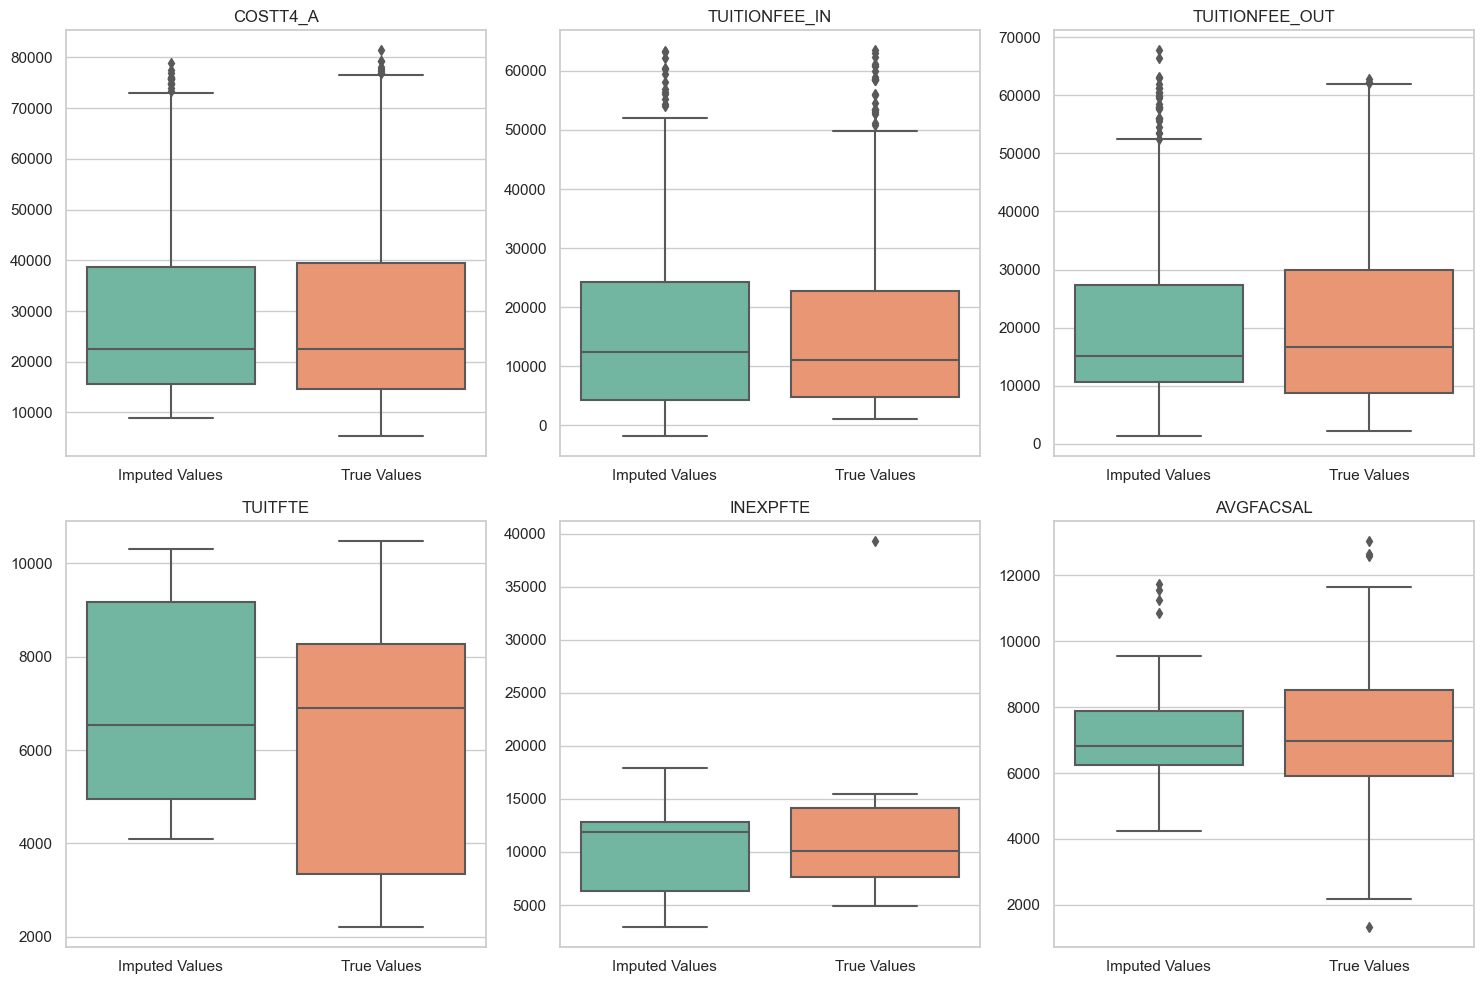

In [267]:
# Set style of seaborn
sns.set(style="whitegrid")

# Determine number of rows and columns for the grid
n = len(columns_to_impute)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

# flatten the axs array in case of more than one row
axs = axs.flatten()

# generate figures
for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create a DataFrame for boxplot
    data_to_plot = pd.DataFrame({'Imputed Values': imputed_data_col, 'True Values': true_value_col})

    # Create boxplot
    sns.boxplot(ax=axs[idx], data=data_to_plot, palette="Set2")
    axs[idx].set_title(col)

# Remove any unused subplots
for idx in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[idx])

# Make layout tighter
plt.tight_layout()
plt.show()


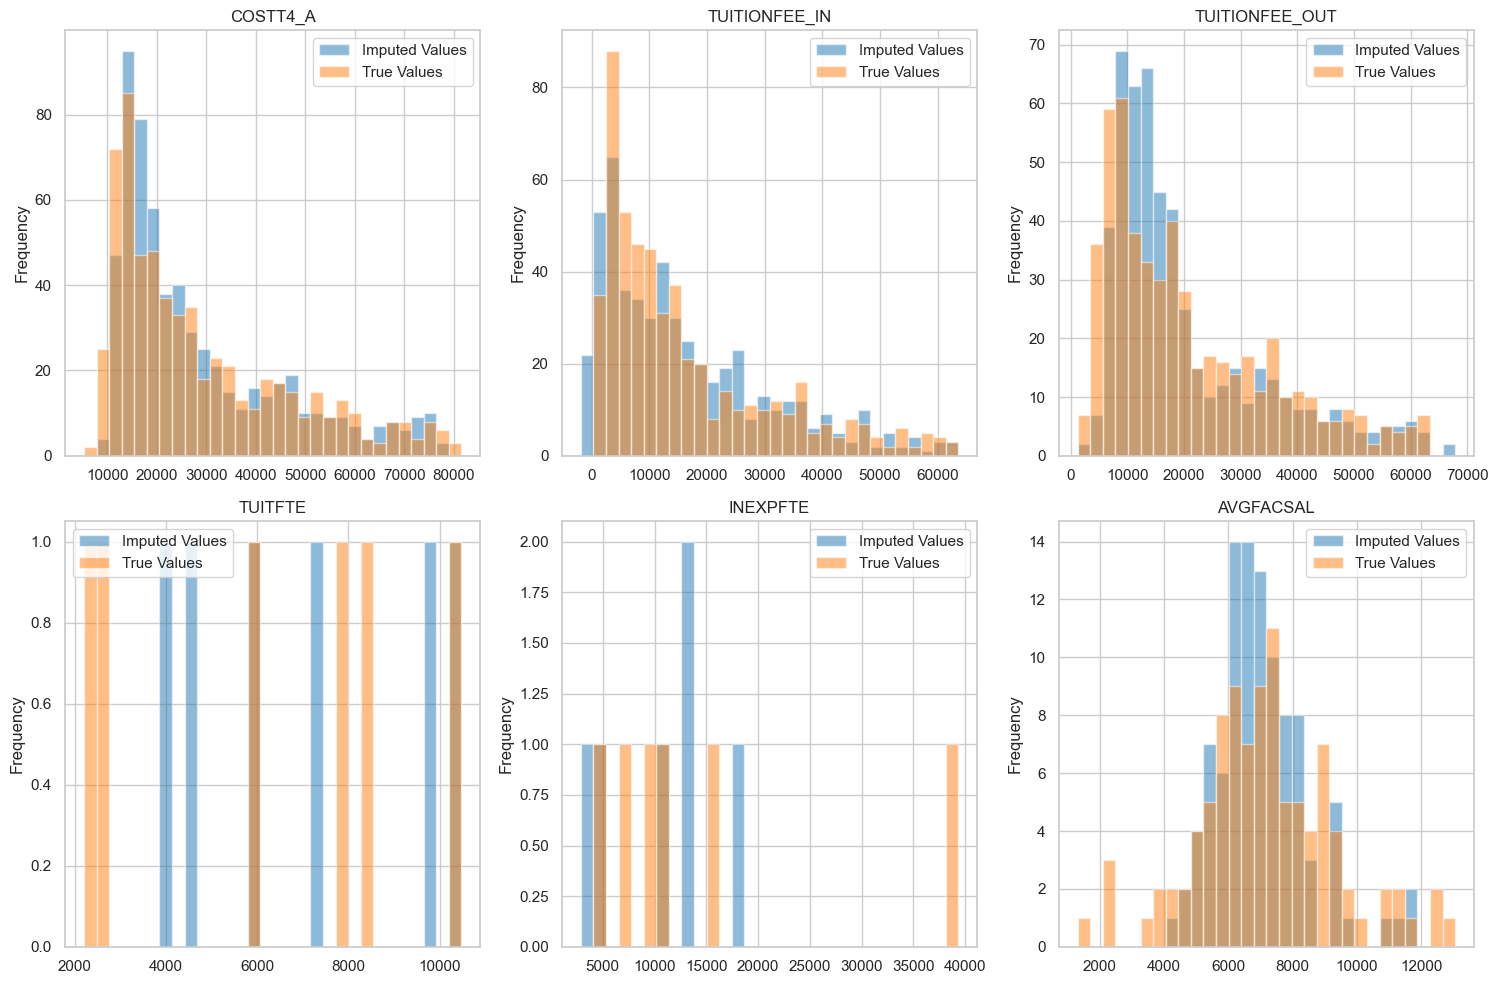

In [268]:
# Grid of Histograms
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create a DataFrame for histogram
    data_to_plot = pd.DataFrame({'Imputed Values': imputed_data_col, 'True Values': true_value_col})

    # Create histogram
    data_to_plot.plot(kind='hist', ax=axs[idx], bins=30, alpha=0.5, color=['#1f77b4', '#ff7f0e'])
    axs[idx].set_title(col)

for idx in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

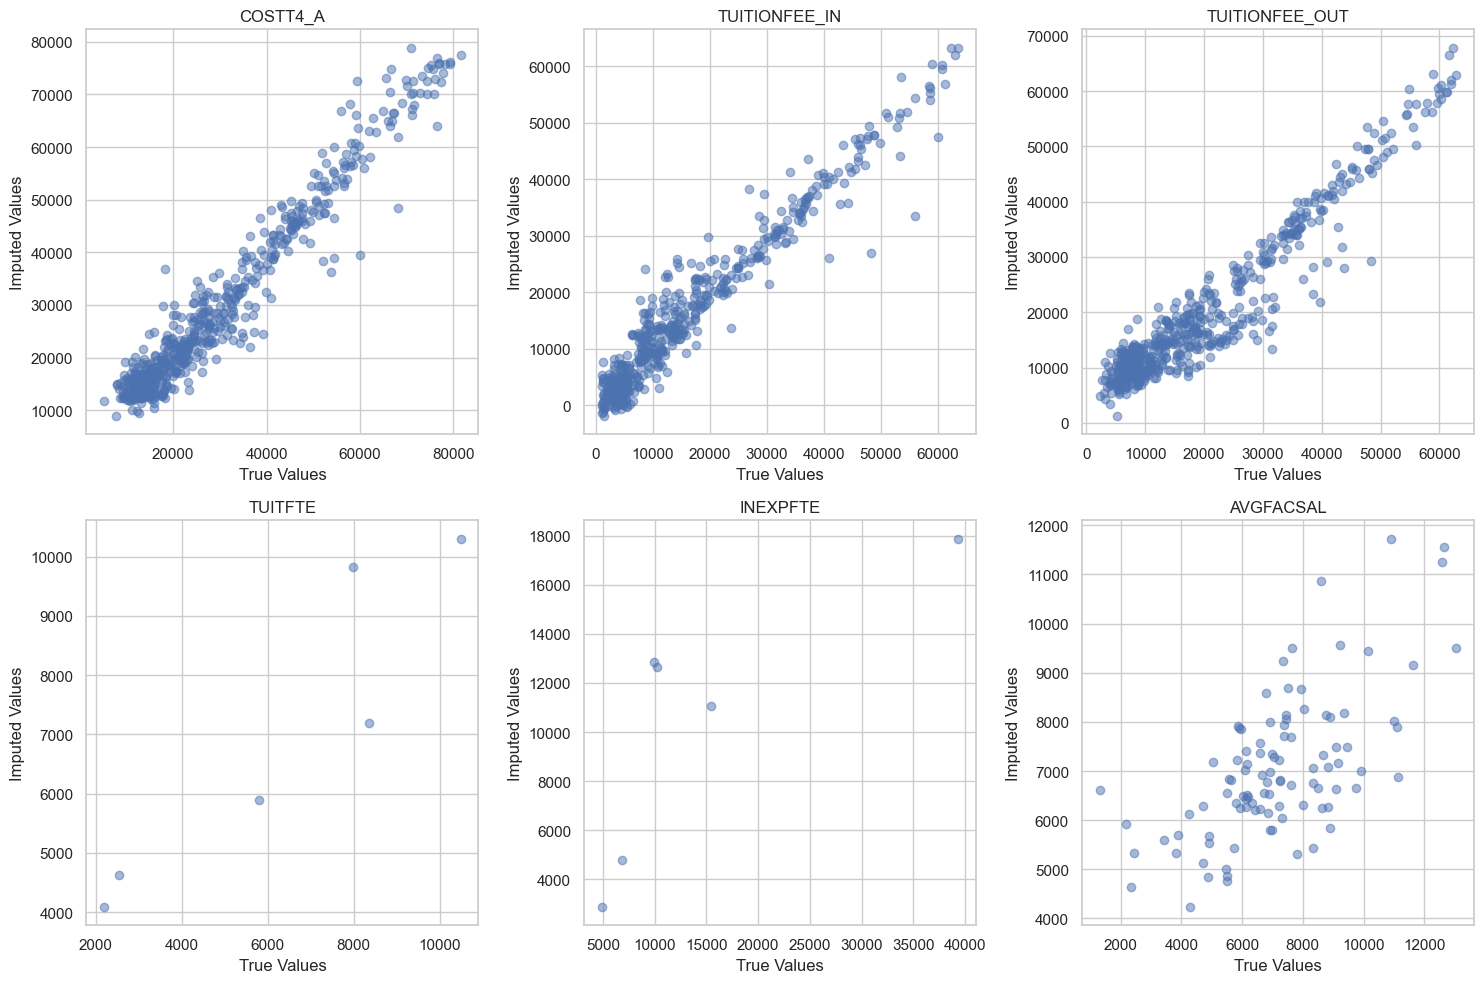

In [269]:
# Grid of Scatterplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

axs = axs.flatten()

for idx, col in enumerate(columns_to_impute):
    null_col = test_df_to_impute[col]
    null_data_index = null_col[null_col.isnull()].index

    imputed_data = test_df_imputed.loc[null_data_index]
    imputed_data_col = imputed_data[col]

    true_value_df = test_df_clean.loc[null_data_index]
    true_value_col = true_value_df[col]

    # Create scatterplot
    axs[idx].scatter(true_value_col, imputed_data_col, alpha=0.5)
    axs[idx].set_title(col)
    axs[idx].set_xlabel('True Values')
    axs[idx].set_ylabel('Imputed Values')

for idx in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [284]:
# Impute values on full dataset
X = finance_df.iloc[:, 1::]

imputed_finance_df = imputation.fit_transform(X=X)
imputed_finance_df = pd.DataFrame(imputed_finance_df, columns=finance_df.columns[1::])
imputed_finance_df = imputed_finance_df.apply(np.round)

/Users/dickinsonjo/repos/CollegePriceTransparency/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [285]:
imputed_finance_df.head()

,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL
0,21924.0,10024.0,18634.0,9243.0,7699.0,8779.0
1,26248.0,8568.0,20400.0,11678.0,14264.0,11590.0
2,28830.0,17646.0,17776.0,14093.0,4381.0,4672.0
3,24869.0,11488.0,23884.0,8246.0,8156.0,9820.0
4,21938.0,11068.0,19396.0,8535.0,9459.0,7701.0
